In [1]:
# project: p5
# submitter: mehrotra6
# partner: none
# hours: 11

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import requests
import re
import geopandas as gpd
import os
import numpy
import edgar_utils
import zipfile
from graphviz import Digraph
from shapely.geometry import Point, Polygon, box

In [3]:
serverLog = pd.read_csv("server_log.zip", compression = "zip")

In [4]:
#Q1
sizeSum = 0
i = 0
while (i < len(serverLog)):
    sizeSum += serverLog["size"][i]
    i += 1

sizeSum.astype(numpy.int64)

24801002666

In [5]:
serverLog

,ip,date,time,zone,cik,accession,extention,code,size,idx,norefer,noagent,find,crawler,browser
0,104.197.32.ihd,2017-01-01,00:00:00,0.0,1111711.0,0001193125-12-324016,-index.htm,200.0,7627.0,1.0,0.0,0.0,10.0,0.0,NaN
1,208.77.214.jeh,2017-01-01,00:00:00,0.0,789019.0,0001193125-06-031505,.txt,200.0,46327.0,0.0,0.0,0.0,10.0,0.0,NaN
2,54.197.228.dbe,2017-01-01,00:00:00,0.0,800166.0,0001279569-16-003038,-index.htm,200.0,16414.0,1.0,0.0,0.0,10.0,0.0,NaN
3,108.39.205.jga,2017-01-01,00:00:01,0.0,354950.0,0000950123-09-011236,-index.htm,200.0,8718.0,1.0,0.0,0.0,10.0,0.0,NaN
4,52.45.218.ihf,2017-01-01,00:00:01,0.0,1313918.0,0001209191-06-031555,.txt,200.0,8911.0,0.0,0.0,0.0,10.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174851,218.50.187.afh,2017-01-01,23:59:56,0.0,1295803.0,0001181431-07-073286,.txt,200.0,29312.0,0.0,0.0,0.0,10.0,0.0,NaN
174852,204.212.175.bch,2017-01-01,23:59:57,0.0,89439.0,0001140361-14-029415,.txt,200.0,2165.0,0.0,0.0,0.0,10.0,0.0,NaN
174853,157.55.39.jad,2017-01-01,23:59:58,0.0,1253986.0,0001104659-12-032900,a12-8801_1ex31d2.htm,301.0,630.0,0.0,0.0,0.0,10.0,0.0,NaN
174854,94.156.218.jad,2017-01-01,23:59:58,0.0,1591913.0,0001615774-16-009113,-index.htm,200.0,7037.0,1.0,0.0,0.0,10.0,0.0,NaN


In [6]:
#Q2
seriesServer = serverLog["ip"].value_counts()
topTen = seriesServer[:10].to_dict()
topTen

{'54.152.17.ccg': 12562,
 '183.195.251.hah': 6524,
 '52.45.218.ihf': 5562,
 '68.180.231.abf': 5493,
 '204.212.175.bch': 4708,
 '103.238.106.gif': 4428,
 '208.77.215.jeh': 3903,
 '208.77.214.jeh': 3806,
 '217.174.255.dgd': 3551,
 '82.13.163.caf': 3527}

In [7]:
#Q3
x = 0
values = 0
while (x < len(serverLog)):
    if (serverLog["code"][x] >= 400):
        values += 1
    x += 1
    
float(values/len(serverLog))

0.03466852724527611

In [8]:
#Q4
## print("cik/accession/extention")
serverLog
serverPart = serverLog[["cik", "accession", "extention"]].value_counts().iloc[:1].index[0]

"".join([str(int(serverPart[0])), "/", serverPart[1], "/", serverPart[2]])

'1627631/0001627631-15-000004/.txt'

In [9]:
#Q5
y = 0
crawler = 0
while (y < len(serverLog)):
    if (serverLog["crawler"][y] > 0):
        crawler += 1
    y += 1
    
crawler

971

In [10]:
serverLog["region"] = serverLog["ip"].apply(edgar_utils.lookup_region)

In [11]:
#Q6
keysList = list(topTen.keys())
edgar_utils.lookup_region(keysList[0])

'United States of America'

In [12]:
#Q7
everythingKeys = list(seriesServer.to_dict().keys())
everythingVals = list(seriesServer.to_dict().values())

keysListVals = []
e = 0
while e < len(everythingKeys):
    keysListVals.append(edgar_utils.lookup_region(everythingKeys[e]))
    e += 1
    
uniqueList = []
for x in keysListVals:
    if x not in uniqueList:
        uniqueList.append(x)
    
uniqueList
dictVals = {}
for y in uniqueList:
    num = 0
    dem = 0
    t = 0
    while (t < len(everythingKeys)):
        if (y == keysListVals[t]):
            if (everythingVals[t] > 1001):
                num += 1
            dem += 1
        t += 1
    dictVals[y] = num / dem

dictVals                          

{'United States of America': 0.019862490450725745,
 'China': 0.006864988558352402,
 'India': 0.058823529411764705,
 'United Kingdom of Great Britain and Northern Ireland': 0.06666666666666667,
 'Korea (Republic of)': 0.2,
 'Canada': 0.017857142857142856,
 'France': 0.0036900369003690036,
 'Bulgaria': 0.3333333333333333,
 'Ireland': 0.3125,
 'Australia': 0.07692307692307693,
 'Hong Kong': 0.0,
 'Germany': 0.0,
 'Czechia': 0.0,
 'Estonia': 0.0,
 'Viet Nam': 0.0,
 'Poland': 0.0,
 'Netherlands': 0.0,
 '-': 0.0,
 'Slovakia': 0.0,
 'Russian Federation': 0.0,
 'Spain': 0.0,
 'Indonesia': 0.0,
 'Ukraine': 0.0,
 'Croatia': 0.0,
 'Italy': 0.0,
 'Taiwan (Province of China)': 0.0,
 'Virgin Islands (British)': 0.0,
 'Liberia': 0.0,
 'Singapore': 0.0,
 'Denmark': 0.0,
 'Romania': 0.0,
 'Luxembourg': 0.0,
 'Switzerland': 0.0,
 'Israel': 0.0,
 'Philippines': 0.0,
 'Egypt': 0.0,
 'Brazil': 0.0,
 'Honduras': 0.0,
 'Greece': 0.0,
 'Sweden': 0.0,
 'Japan': 0.0,
 'Cyprus': 0.0,
 'Latvia': 0.0,
 'Thailand':

In [13]:
#Q8
filingDict = {}
docsKey = []
docsVals = []

with zipfile.ZipFile("docs.zip") as zf:
    for name in zf.filelist:
        if name.filename.split(".")[-1] in ['html', 'htm']:
            with zf.open(name.filename) as f:
                filingDict[name.filename] = edgar_utils.Filing(str(f.read(), "utf-8"))
            
filingDict["850693/0000850693-07-000159/-index.htm"].dates

['2007-07-25', '2007-07-25', '2007-07-23']

In [14]:
#Q9
statesDict = {}
for key in filingDict.keys():
    if filingDict[key].state() != None:
        if filingDict[key].state() not in statesDict.keys():
            statesDict[filingDict[key].state()] = 1
        else:
            statesDict[filingDict[key].state()] += 1

statesDict

{'CA': 92,
 'NJ': 23,
 'MS': 1,
 'MA': 30,
 'CO': 25,
 'NY': 83,
 'TX': 67,
 'FL': 21,
 'AL': 1,
 'IN': 5,
 'CT': 14,
 'UT': 5,
 'MD': 13,
 'KS': 5,
 'VA': 15,
 'OH': 10,
 'SD': 1,
 'DE': 9,
 'IL': 25,
 'GA': 9,
 'NC': 9,
 'PA': 25,
 'TN': 4,
 'MN': 15,
 'NM': 1,
 'KY': 2,
 'OK': 7,
 'AR': 1,
 'NV': 6,
 'VT': 1,
 'MO': 4,
 'MI': 11,
 'NE': 2,
 'IA': 6,
 'AZ': 5,
 'WI': 9,
 'LA': 2,
 'ID': 1,
 'OR': 2,
 'WV': 2,
 'WA': 3,
 'DC': 1,
 'ME': 1}

In [15]:
#Q10
sicDict = {}
for key in filingDict.keys():
    if filingDict[key].sic != None:
        if filingDict[key].sic not in sicDict.keys():
            sicDict[filingDict[key].sic] = 1
        else:
            sicDict[filingDict[key].sic] += 1
sicDict

{2834: 40,
 6022: 20,
 1311: 20,
 6189: 17,
 6211: 17,
 8731: 2,
 1389: 19,
 7370: 7,
 3571: 1,
 7361: 1,
 3674: 5,
 4931: 5,
 1040: 2,
 2810: 2,
 7389: 11,
 3140: 1,
 7374: 4,
 6200: 1,
 7381: 1,
 3620: 3,
 3841: 6,
 4941: 1,
 5621: 1,
 7330: 1,
 6199: 8,
 6798: 20,
 2510: 4,
 3990: 2,
 1700: 5,
 7371: 6,
 5940: 2,
 4522: 5,
 1731: 2,
 6311: 2,
 8082: 2,
 2836: 13,
 6021: 20,
 1000: 11,
 4911: 8,
 6324: 2,
 8051: 1,
 6035: 4,
 3550: 1,
 4813: 4,
 6321: 2,
 2890: 1,
 3845: 2,
 2860: 8,
 1221: 2,
 3669: 2,
 6411: 1,
 5900: 2,
 2320: 1,
 6221: 3,
 6331: 10,
 2070: 1,
 8742: 5,
 3829: 3,
 900: 5,
 5500: 2,
 7372: 11,
 6770: 1,
 4841: 2,
 4833: 1,
 7384: 1,
 6799: 3,
 3826: 5,
 8711: 2,
 5160: 1,
 5944: 1,
 3420: 3,
 3510: 3,
 5960: 1,
 3842: 4,
 8062: 3,
 6029: 11,
 7320: 1,
 5172: 2,
 1382: 2,
 3663: 4,
 1400: 3,
 7822: 1,
 2024: 1,
 2080: 1,
 7812: 2,
 4922: 2,
 2030: 1,
 3576: 3,
 2711: 1,
 3578: 1,
 3679: 2,
 2842: 1,
 4899: 1,
 100: 1,
 3541: 1,
 7311: 1,
 3317: 1,
 2033: 1,
 3721: 1

In [16]:
#Q11
sicList = []
for row in serverLog.itertuples():
    path = (f"{int(row.cik)}/{row.accession}/{row.extention}")
    if path in filingDict.keys():
        sicList.append(filingDict[path].sic)
    
pd.value_counts(sicList).to_dict()

{2834: 984,
 1389: 656,
 1311: 550,
 2836: 429,
 6022: 379,
 1000: 273,
 6211: 237,
 7371: 229,
 2860: 226,
 6021: 204,
 2510: 171,
 6282: 171,
 3825: 164,
 4841: 108,
 5621: 99,
 7200: 94,
 7374: 94,
 6331: 91,
 5311: 90,
 6798: 90,
 3842: 87,
 6221: 85,
 6029: 83,
 3272: 81,
 3829: 73,
 4931: 70,
 3510: 66,
 7830: 62,
 3826: 56,
 3695: 55,
 3620: 50,
 7373: 48,
 6799: 46,
 4412: 43,
 4512: 42,
 7340: 40,
 900: 39,
 7370: 39,
 3621: 38,
 6513: 38,
 5172: 36,
 4213: 35,
 5900: 35,
 3990: 34,
 5122: 34,
 2070: 33,
 5944: 33,
 8090: 32,
 1700: 31,
 4922: 31,
 3312: 31,
 1381: 31,
 6324: 30,
 8742: 27,
 7389: 26,
 8731: 25,
 7812: 25,
 3590: 24,
 3663: 23,
 4955: 23,
 4522: 22,
 6321: 21,
 3559: 20,
 6792: 19,
 5812: 19,
 6189: 18,
 7372: 16,
 3841: 14,
 6199: 11,
 1731: 11,
 4911: 8,
 6035: 7,
 4833: 7,
 2430: 6,
 3571: 6,
 3674: 5,
 3679: 5,
 4813: 4,
 4812: 4,
 3678: 4,
 5500: 4,
 1531: 4,
 6411: 3,
 3576: 3,
 8062: 3,
 2800: 3,
 3420: 3,
 1400: 3,
 2111: 2,
 7900: 2,
 5661: 2,
 6141: 

In [17]:
#Q12
hours = pd.to_datetime(serverLog["time"]).apply(lambda t:t.hour)
hours.value_counts().sort_index().to_dict()

{0: 8305,
 1: 8242,
 2: 8550,
 3: 8850,
 4: 8343,
 5: 9783,
 6: 7761,
 7: 8213,
 8: 8292,
 9: 11033,
 10: 6377,
 11: 6435,
 12: 6155,
 13: 6006,
 14: 6654,
 15: 6512,
 16: 5680,
 17: 6487,
 18: 6356,
 19: 6211,
 20: 6066,
 21: 6164,
 22: 6098,
 23: 6283}

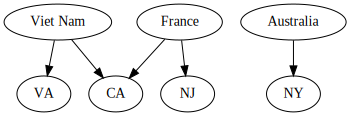

In [18]:
#Q13
graph = Digraph()
countryList = ["Australia", "France", "Viet Nam"]
edges = set()

for row in serverLog.itertuples():
    path = (f"{int(row.cik)}/{row.accession}/{row.extention}")
    if path in filingDict.keys():
        state = filingDict[path].state()
        if state and (row.region in countryList):
            edges.add((row.region, state))

for country, state in edges:
    graph.edge(country, state)
graph

In [19]:
#Q14
addressList = []
for row in serverLog.itertuples():
    path = (f"{int(row.cik)}/{row.accession}/{row.extention}")
    if path in filingDict.keys():
        for element in filingDict[path].addresses:
            addressList.append(element)
    
tempDict = pd.value_counts(addressList).to_dict()

newDict = {}
for val in tempDict:
    if tempDict[val] > 224:
        newDict[val] = tempDict[val]
newDict

{'801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102': 720,
 '801 CHERRY STREET\nSUITE 2100\nFORT WORTH TX 76102\n817-334-4100': 464,
 '1114 AVENUE OF THE AMERICAS\n29TH FLOOR\nNEW YORK NY 10036': 356,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104': 305,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383': 289,
 '10119 W. LARIAT LANE\nPEORIA AZ 85383\n425-442-0931': 289,
 '1881 GROVE AVENUE\nRADFORD VA 24141': 277,
 '1 SANSOME ST\n30TH FL\nSAN FRANCISCO CA 94104\n3125066500': 264,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020': 225,
 '1251 AVENUE OF THE AMERICAS\nNEW YORK NY 10020\n212-956-2221': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3': 225,
 '1177 WEST HASTINGS STREET\nSUITE 2300\nVANCOUVER A1 V6E 2K3\n604-683-6332': 225}

<AxesSubplot:>

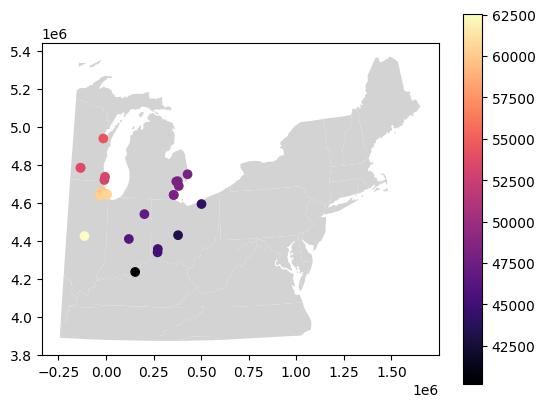

In [20]:
#Q15

b = box(-90, 35, -55, 50)
background = gpd.read_file("shapes/cb_2018_us_state_20m.shp")

gdf = gpd.read_file("locations.geojson")
background = background.intersection(b)


background = background.to_crs("EPSG:2022")


def helperFunction(string):
    finalInt = 0
    if string[-5:-4] == "-":
        if (string[-9:-5]).isdigit():
            finalInt = int(string[-9:-5])
    elif string[-5:-4] == 0:
        if (string[-4:]).isdigit():
            finalInt = int(string[-4:])
    else:
        if (string[-5:]).isdigit():
            finalInt = int(string[-5:])
            
    while (finalInt <= 70000 and finalInt >= 40000):
        return finalInt

gdf["Zip Code"] = gdf["address"].apply(helperFunction)

gdf = gdf[gdf.intersects(b)]
gdf = gdf.to_crs("EPSG:2022")


ax = background.plot(facecolor = "lightgray")
gdf.plot(figsize=(12,6), column="Zip Code", legend=True, cmap="magma", ax=ax)
#ax.set_axis_off()